___
# Atividade: Modelos probabilísticos discretos e Dados
___

## Aula 09 - Atividade

<div id="indice"></div>

## Índice

- [Teoria: Distribuição Binomial](#teoria)
    - [Esperança e Variância](#esperanca-variancia)
- [Base de Dados: DETRAN](#detran)
    - [Resultados empíricos](#resultados-empiricos)
        - [Exercício 1](#ex1)
        - [Exercício 2](#ex2)
    - [Modelo teórico](#modelo-teorico)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
    - [Comparação: resultados empíricos X modelo teórico](#comparacao)
        - [Opção 1: Frequências relativas X Probabilidades teóricas](#opcao1)
        - [Opção 2: Frequência relativa acumulada X Probabilidade acumulada](#opcao2)
        - [Exercício 5](#ex5)
        - [Exercício 6](#ex6)
        - [Exercício 7](#ex7)
- [Lista de comandos utilizados neste notebook](#comandos)

___

<div id="teoria"></div>

## Teoria: Distribuição Binomial

A distribuição binomial modela a número de sucessos (o evento de interesse) em uma determinada quantidade de tentativas. Mais formalmente, dizemos que uma variável aleatória $Y$ segue uma distribuição binomial utilizando a seguinte notação: $Y$~$Bin(n,p)$. Essa notação pode ser lida como: $Y$ segue uma distribuição binomial com $n$ tentativas e $p$ como probabilidade de sucesso em cada evento independente.

A função de probabilidade (lembrando: que associa uma probabilidade a cada valor possível de $Y$) é dada por:

$$P(Y=y)=\left(
\begin{array}{c}
    n \\
    y
\end{array}\right) p^y (1-p)^{(n-y)}$$

Para que um experimento possa ser modelado por uma distribuição binomial, ele precisa ter as seguintes propriedades:

- ser uma contagem de $n$ repetições (ou tentativas, ou ensaios) idênticas;
- cada repetição tem apenas 2 resultados possíveis: um é denominado sucesso (o resultado de interesse, que não necessariamente é positivo) e o outro, fracasso;
- a probabilidade de sucesso para cada ensaio é denominada $p$ e será constante em cada repetição. Consequentemente, a probabilidade de fracasso $(1-p)$ também não varia de tentativa para tentativa;
- as tentativas são independentes.

<div id="esperanca-variancia"></div>

### Esperança e Variância

Se $Y$~$Bin(n,p)$, o valor esperado $E(Y)$ e a variância $Var(Y)$ são dados por:

$$E(Y) = np$$

$$Var(Y) = np(1-p)$$

___

<div id="detran"></div>

# <font color='blue'>Base de Dados: DETRAN</font> 

Esse exercício irá explorar uma modelagem de dados reais.

> **Confira alguns itens obrigatórios verificados durante a vistoria do Detran**
>
> *Todos os veículos, novos ou velhos, precisam passar por uma vistoria todos os anos. (...) O motorista precisa estar atento a alguns itens obrigatórios. Tudo deve funcionar perfeitamente, apresentar bom estado de conservação e estar dentro do prazo de validade.*
>
> <sup>Fonte: http://extra.globo.com/noticias/brasil/transito-seguro/confira-alguns-itens-obrigatorios-verificados-durante-vistoria-do-detran-10190355.html</sup>

Essa matéria lista 14 itens que são inspecionados pelo Detran, dentre os quais têm-se: extintor de incêndio deve estar dentro do prazo de validade; pneus devem estar em bom estado de conservação; buzina deve funcionar perfeitamente; e cintos de segurança para todos os ocupantes do carro. Se, no final das contas, todos os 14 itens estiverem funcionando perfeitamente, o motorista irá feliz para casa assegurado de que seu carro está sem problemas com a vistoria.

A base de dados `Carros.txt` apresenta, para cada um dos três mil carros de passeio vistoriados, duas informações:

- **Tipo**: tipo de carro (1: Popular e 2: Não Popular)
- **Quantidade**: quantidade de itens vistoriados em não conformidade (que pode variar de 0 a 14)

Vamos começar carregando a base em um `DataFrame`:

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

In [27]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())
carros = pd.read_table('Carros.txt', sep=' ')
carros.head()

Esperamos trabalhar no diretório
C:\Users\matfs\Desktop\Ciência dos Dados\My_CD20-1\CD20-1\aula09


,Tipo,Quantidade
1,1,0
2,1,2
3,1,2
4,1,3
5,1,1


<div id="resultados-empiricos"></div>

## Resultados empíricos

<div id="ex1"></div>

### EXERCÍCIO 1

Considerando todos os carros, gere uma tabela de frequências relativas da quantidade de itens vistoriados em não conformidade (variável **Quantidade**). Armazene essa tabela em uma variável chamada `frequencias_relativas`. **Observação:** utilize o método `.sort_index()` no resultado do `.value_counts()` para corrigir a ordenação.

In [21]:
# ESCREVA O CÓDIGO DA SUA RESPOSTA AQUI
frequencias_relativas = carros['Quantidade'].value_counts(True).sort_index()
frequencias_relativas

0    0.288000
1    0.316667
2    0.221333
3    0.108333
4    0.046333
5    0.015667
6    0.002667
7    0.000667
8    0.000333
Name: Quantidade, dtype: float64

<div id="ex2"></div>

### EXERCÍCIO 2

1. **A partir da tabela de frequências relativas**, calcule a média, variância e desvio padrão da quantidade de itens vistoriados em não conformidade. Ou seja, sem utilizar as funções `.mean()`, `.var(ddof=0)` e `std(ddof=0)`. Para isso, será necessário utilizar as fórmulas vistas em aula:

    $$\overline{Y} = \sum\limits_y y\cdot P(Y=y)$$

    $$Var(Y) = \sum\limits_y (y-\overline{Y})^2\cdot P(Y=y)$$
    
    $$DP(Y) = \sqrt{Var(Y)}$$

1. Compare os resultados com a média e variância obtidas a partir das funções `.mean()` `.var(ddof=0)` e `.std(ddof=0)`.

1. Explique sucintamente o que você pode concluir a partir desses valores.

In [22]:
# ESCREVA O CÓDIGO DA SUA RESPOSTA AQUI

from math import sqrt

media = 0
for i in range(len(frequencias_relativas)):
    media += frequencias_relativas[i]*frequencias_relativas.index[i]
    
var = 0    
for j in range(len(frequencias_relativas)):
    var += (frequencias_relativas.index[j] - media)**2 * frequencias_relativas[j]

dp = sqrt(var)

print("Média: {0} e {1}".format(media, carros.Quantidade.mean()))
print("Variância: {0} e {1}".format(var, carros.Quantidade.var(ddof=0)))
print("Desvio-Padrão: {0} e {1}".format(dp, carros.Quantidade.std(ddof=0)))

Média: 1.3713333333333333 e 1.3713333333333333
Variância: 1.5794448888888888 e 1.5794448888889108
Desvio-Padrão: 1.2567596782555084 e 1.256759678255517


ESCREVA SUAS CONCLUSÕES AQUI

**Os resultados batem!**

<div id="modelo-teorico"></div>

## Modelo teórico

<div id="ex3"></div>

### EXERCÍCIO 3

Assuma que a variável **Quantidade** possa ser ajustada pelo modelo binomial com parâmetros $n=14$ e $p=0,10$. Interprete esses parâmetros para o problema em questão e, ainda, discuta se as propriedades da distribuição binomial estão satisfeitas para o problema aqui me questão.

PREENCHA COM AS SUAS RESPOSTAS:
    
- $n = 14$: Número de tentativas, ou seja, número de carros vistoriados.
- $p = 0,10$: Probabilidade de sucesso, ou seja, chance de encontrar algum item em não conformidade.

As propriedades da distribuição binomial [estão satisfeitas/não estão satisfeitas] para o problema em questão porque [COMPLETE COM A SUA RESPOSTA]

**Independente da sua resposta anterior, considere que a distribuição binomial seja adequada para modelar a variável de interesse nos próximos exercícios!**

<div id="ex4"></div>

### EXERCÍCIO 4

<div id="pmf-stats"></div>

1. Consulte a [documentação do método `stats.binom.pmf`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html). Utilizando esse método, obtenha a probabilidade de cada uma das quantidades de itens em não conformidade, ou seja, de 0 a 14, quando $n=14$ e $p=0,10$. Armazene as probabilidades em uma lista (probabilidades de todas as quantidades possíveis, de 0 a 14) e guarde esta lista em uma variável chamada `probabilidades_teoricas`.
1. Calcule o valor esperado e a variância da quantidade de itens em não conformidade utilizando os métodos `stats.binom.mean` e `stats.binom.var` (a documentação está na mesma página do método `stats.binom.pmf`) e compare com a esperança e variância calculados a partir das [fórmulas da distribuição binomial](#esperanca-variancia).

In [23]:
# ESCREVA SEU CÓDIGO AQUI
from scipy import stats

n = 14
p = 0.1
probabilidades_teoricas = []
for i in range(0,n):
    probabilidades_teoricas.append(stats.binom.pmf(i, n, p))
    
media_teorico = n*p
var_teorico = n*p*(1-p)

print("Comparando Média: {0} , {1}".format(media_teorico, stats.binom.mean(n, p)))
print("Comparando Variância: {0} , {1}".format(var_teorico, stats.binom.var(n, p)))

Comparando Média: 1.4000000000000001 , 1.4000000000000001
Comparando Variância: 1.2600000000000002 , 1.2600000000000002


<div id="comparacao"></div>

## Comparação: resultados empíricos *vs* modelo teórico

Vamos comparar as probabilidades teóricas ([exercício 4](#ex4)) com as frequências relativas observadas nos dados ([exercício 2](#ex2)). Para isso, temos, por exemplo, as duas opções gráficas a seguir para verificar se os resultados empíricos se encaixam no modelo teórico proposto. Procure entender pelo menos a ideia do código que gera os gráficos abaixo (pode ser necessário procurar alguma documentação, mas não se preocupe em entender todos os detalhes), eles serão úteis na última questão.

<div id="opcao1"></div>

### Opção 1: Frequências relativas *vs* Probabilidades teóricas

A primeira opção gráfica contrasta a frequência relativa e a probabilidade teórica para uma determinada quantidade de itens em não conformidade. Essa opção contrasta a frequência relativa para um valor de $y$ com a probabilidade pontual $P(Y=y)$.

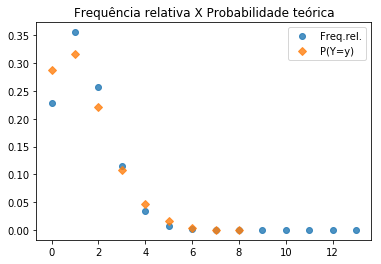

In [24]:
fr = frequencias_relativas
pr = probabilidades_teoricas
plt.plot(range(len(pr)), pr, 'o', alpha=0.8)
plt.plot(range(len(fr)), fr, 'D', alpha=0.8)
plt.legend(('Freq.rel.','P(Y=y)'))
plt.title('Frequência relativa X Probabilidade teórica')
plt.show()

<div id="opcao2"></div>

### Opção 2: Frequência relativa acumulada *vs* Probabilidade acumulada

A segunda opção gráfica contrasta a frequência relativa acumulada com a probabilidade acumulada até determinada quantidade de itens em não conformidade. Ou seja, compara a frequência relativa acumulada até $y$ com a probabilidade acumulada $P(Y\leq y)$.

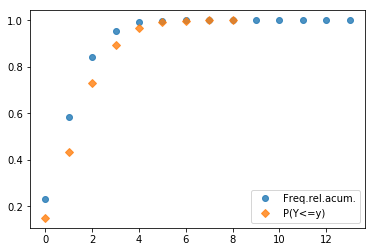

In [64]:
fra = fr.cumsum()
n = 14
p = 0.1
fda =stats.binom.cdf(range(14), n, p)

plt.plot(range(n), fda, 'o', alpha=0.8)
plt.plot(range(len(fra)), fra, 'D', alpha=0.8)
plt.legend(('Freq.rel.acum.','P(Y<=y)'))
plt.show()

<div id="ex5"></div>

### EXERCÍCIO 5

Baseado nos gráficos acima, refine sua conclusão quanto ao uso do modelo teórico para ajustar a variável em questão ([exercício 3](#ex3)).

ESCREVA SUA RESPOSTA AQUI

<div id="ex6"></div>

### EXERCÍCIO 6

Na prática, qual a necessidade de um modelo probabilístico já que temos os dados observados?

ESCREVA SUA RESPOSTA AQUI

<div id="ex7"></div>

### EXERCÍCIO 7

Considerando apenas os carros populares, o modelo binomial com parâmetros $n=14$ e $p=0,10$ é adequado para ajustar a variável **Quantidade**? Se sim, justifique; caso não, sugira novos valores para os parâmetros da distribuição para que ela se ajuste aos dados. **Dica**: utilize a [fórmula de $E(Y)$](#esperanca-variancia).

In [29]:
# ESCREVA SEU CÓDIGO AQUI
populares = carros.loc[carros.Tipo == 1, :]
populares.head()

,Tipo,Quantidade
1,1,0
2,1,2
3,1,2
4,1,3
5,1,1


In [47]:
frequencias_relativas = populares.Quantidade.value_counts(True).sort_index()
frequencias_relativas 

0    0.149444
1    0.283889
2    0.295000
3    0.166667
4    0.072778
5    0.026111
6    0.004444
7    0.001111
8    0.000556
Name: Quantidade, dtype: float64

In [65]:
n = 14
# Ajuste de probabilidade (0.15).
p = 0.15
probabilidades_teoricas = []
for i in range(0,n):
    probabilidades_teoricas.append(stats.binom.pmf(i, n, p))

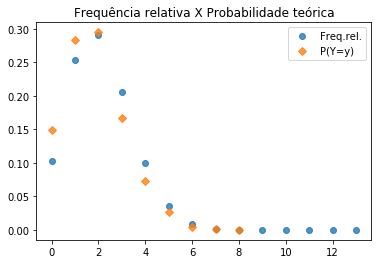

In [66]:
fr = frequencias_relativas
pr = probabilidades_teoricas
plt.plot(range(len(pr)), pr, 'o', alpha=0.8)
plt.plot(range(len(fr)), fr, 'D', alpha=0.8)
plt.legend(('Freq.rel.','P(Y=y)'))
plt.title('Frequência relativa X Probabilidade teórica')
plt.show()

**Faz até mais sentido, porque a probabilidade de ter um item em não conformidade em carros popular deve ser maior teoricamente!**

<div id="comandos"></div>

___

## Lista de comandos utilizados neste notebook

Os seguintes comandos foram utilizados neste jupyter notebook. Para facilitar sua consulta, escreva um resumo do que cada um deles faz:

- [`stats.binom.pmf`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`stats.binom.mean`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`stats.binom.var`](#pmf-stats): ESCREVA AQUI O RESUMO
